# Equity research demo
Steps in research process:
1. **pull_data.py**: functions to import raw data from WRDS API; datasets include CRSP for pricing, Compustat for fundamental data, IBES for analyst estimates, Thomson Reuters for 13F data
2. **create_feature_df.py**: functions to calculate stock characteristics (features) from input data, lag appropriately, and merge onto standardized dataframe; mostly replicating well-known academic papers + variations
3. **test_signals.py**: Backtester class with functions to create signals from features (rank features within a particular universe), perform analytics based on backtests, and output finalized models (collections of signals)
4. **optimize_portfolios.py**: SecurityRanker class with functions to combine signals based on different optimization frameworks; PortfolioConstructor class that gets final portfolio weights by imposing basic portfolio construction constraints on the security ranking

## Summary of data

In [96]:
from create_feature_df import get_features
from test_signals import get_universe

A universe is a dataframe of the largest n_stocks indexed by permno (stock identifier) and date

In [3]:
df_univ = get_universe(n_stocks=3000,
                       start_date='1980-01-01',
                       univ_path='universes/',
                       univ_name='univ_3000.pkl')
df_univ.head()

me_lag  bidask_lag  industry    retadj   retadj1  \
permno  date                                                              
10001.0 2011-04-01  91.892816    0.000853      30.0 -0.038789  0.028050   
        2011-05-01  91.535726    0.001782      30.0  0.028050  0.008261   
        2011-06-01  93.736500    0.003484      30.0  0.008261 -0.028139   
        2011-07-01  94.144052    0.003469      30.0 -0.028139 -0.013864   
        2011-08-01  91.128182    0.004482      30.0 -0.013864  0.005009   

                     retadj2   retadj3   retadj4   retadj5   retadj6  \
permno  date                                                           
10001.0 2011-04-01  0.008261 -0.028139 -0.013864  0.005009  0.005005   
        2011-05-01 -0.028139 -0.013864  0.005009  0.005005 -0.005000   
        2011-06-01 -0.013864  0.005009  0.005005 -0.005000  0.051835   
        2011-07-01  0.005009  0.005005 -0.005000  0.051835 -0.019702   
        2011-08-01  0.005005 -0.005000  0.051835 -0.019702  0.005005   

                     retadj7   retadj8   retadj9  retadj10  retadj11  retadj12  
permno  date                                                                    
10001.0 2011-04-01 -0.005000  0.051835 -0.019702  0.005005  0.048760 -0.015000  
        2011-05-01  0.051835 -0.019702  0.005005  0.048760 -0.015000 -0.084361  
        2011-06-01 -0.019702  0.005005  0.048760 -0.015000 -0.084361 -0.027325  
        2011-07-01  0.005005  0.048760 -0.015000 -0.084361 -0.027325  0.009406  
        2011-08-01  0.048760 -0.015000 -0.084361 -0.027325  0.009406 -0.012315

The feature dataframe is created in Step 2 above, also indexed by permno/date. Incorporating a new dataset or new idea for a feature to test amounts to transforming the data into this schema, lagging appropriately (to align with t+1 return), and appending as a column to this dataframe

In [5]:
df_feat = get_features(overwrite=False,
                  feat_path='',
                  feat_file='features.pkl')
df_feat.head()

mean_5  mean_10  mean_22  mean_198  mean_252  mean_756  \
permno  date                                                                 
10000.0 1986-02-01     NaN      NaN      NaN       NaN       NaN       NaN   
        1986-03-01     NaN      NaN      NaN       NaN       NaN       NaN   
        1986-04-01     NaN      NaN      NaN       NaN       NaN       NaN   
        1986-05-01     NaN      NaN      NaN       NaN       NaN       NaN   
        1986-06-01     NaN      NaN      NaN       NaN       NaN       NaN   

                    std_22  std_252  volume_5  volume_5_shrout  ...  pe0  pe1  \
permno  date                                                    ...             
10000.0 1986-02-01     NaN      NaN       NaN              NaN  ...  NaN  NaN   
        1986-03-01     NaN      NaN       NaN              NaN  ...  NaN  NaN   
        1986-04-01     NaN      NaN       NaN              NaN  ...  NaN  NaN   
        1986-05-01     NaN      NaN       NaN              NaN  ...  NaN  NaN   
        1986-06-01     NaN      NaN       NaN              NaN  ...  NaN  NaN   

                    pe2  pe3  pe4  pe5  ltg  ret_unexpl_22  ret_unexpl_10  \
permno  date                                                                
10000.0 1986-02-01  NaN  NaN  NaN  NaN  NaN            NaN            NaN   
        1986-03-01  NaN  NaN  NaN  NaN  NaN            NaN            NaN   
        1986-04-01  NaN  NaN  NaN  NaN  NaN            NaN            NaN   
        1986-05-01  NaN  NaN  NaN  NaN  NaN            NaN            NaN   
        1986-06-01  NaN  NaN  NaN  NaN  NaN            NaN            NaN   

                    ret_unexpl_5  
permno  date                      
10000.0 1986-02-01           NaN  
        1986-03-01           NaN  
        1986-04-01           NaN  
        1986-05-01           NaN  
        1986-06-01           NaN  

[5 rows x 102 columns]

In [6]:
df_feat.columns.values

array(['mean_5', 'mean_10', 'mean_22', 'mean_198', 'mean_252', 'mean_756',
       'std_22', 'std_252', 'volume_5', 'volume_5_shrout', 'stdvolume_22',
       'bidask_5', 'mve', 'corr_sp_22', 'corr_sp_252', 'corr_sp_756',
       'beta_sp_22', 'beta_sp_252', 'beta_sp_756', 'beta_sp_22_sq',
       'beta_sp_252_sq', 'beta_sp_756_sq', 'shrout_pct', 'e_std_22',
       'e_std_252', 'be_growth', 'asset_growth', 'inv', 'inv2',
       'sales_momentum', 'eps_momentum', 'prof_momentum',
       'prof2_momentum', 'cf_momentum', 'cf2_momentum', 'sales_growth',
       'eps_growth', 'prof_growth', 'prof2_growth', 'cf_growth',
       'cf2_growth', 'sales_std', 'eps_std', 'prof_std', 'prof2_std',
       'cf_std', 'cf2_std', 'sales_asset', 'eps_asset', 'prof_asset',
       'prof2_asset', 'cf_asset', 'cf2_asset', 'acc_asset', 'acc2_asset',
       'td_asset', 'sales_be', 'eps_be', 'prof_be', 'prof2_be', 'cf_be',
       'cf2_be', 'acc_be', 'acc2_be', 'td_be', 'chdebt_asset', 'chdebt_z',
       'chdebt_growth'

Some examples of signals ("value" is a combination of forward- and backward-looking valuation ratios normalized within industry, "profitability" is a combination of quality measures normalized within industry, and "fmomentum" is a combination of fundamental momentum and earnings surprise measures). Signal specifications tell Backtester how to calculate signals from features. Models are collections of signals.

In [1]:
value = {
    'signal_name':'value',
    'features':['be_me','sales_ev','cf_ev','pe0','pe1'],
    'weights':[1,1,1,1,1],
    'industry_adjust':True,
    'ffill':3
}
profitability = {
    'signal_name':'profitability',
    'features':['prof_asset','prof2_asset','sales_asset','cf2_asset'],
    'weights':[1,1,1,1],
    'industry_adjust':True,
    'ffill':3
}
fmomentum = {
    'signal_name':'fmomentum',
    'features':['momentum_earn_3','momentum_idio_5','eps_momentum','cf_momentum','cf2_momentum','sales_momentum','sue','surprise_z'],
    'weights':[1,1,1,1,1,1,1,1],
    'industry_adjust':False,
    'ffill':3
}

In [2]:
model_improved_ff = [value,profitability,fmomentum]

## Backtester functionality

In [2]:
from test_signals import Backtester

Backtester can be initialized with a universe and a model.

In [5]:
bt = Backtester(univ_name='univ_3000', #largest 3000 stocks
                signal_specs=model_improved_ff #model specified above
               )

getting feature dataframe from features.pkl
reading universe from universes/univ_3000.pkl
initializing model from signal specifications
creating signal dataframe


Model specification and data can be saved.

In [6]:
bt.output_model('improved_ff_3000')

Backtester can be initialized with the name of a previously saved model

In [3]:
bt = Backtester(model_name='improved_ff_3000')

getting feature dataframe from features.pkl
initializing from output model improved_ff_3000


In [21]:
bt.model_spec

[{'signal_name': 'value',
  'features': ['be_me', 'sales_ev', 'cf_ev', 'pe0', 'pe1'],
  'weights': [1, 1, 1, 1, 1],
  'industry_adjust': True,
  'ffill': 3},
 {'signal_name': 'profitability',
  'features': ['prof_asset', 'prof2_asset', 'sales_asset', 'cf2_asset'],
  'weights': [1, 1, 1, 1],
  'industry_adjust': True,
  'ffill': 3},
 {'signal_name': 'fmomentum',
  'features': ['momentum_earn_3',
   'momentum_idio_5',
   'eps_momentum',
   'cf_momentum',
   'cf2_momentum',
   'sales_momentum',
   'sue',
   'surprise_z'],
  'weights': [1, 1, 1, 1, 1, 1, 1, 1],
  'industry_adjust': False,
  'ffill': 3}]

In [22]:
bt.df_sig.head()

me_lag  bidask_lag  industry    retadj   retadj1  \
permno  date                                                              
10001.0 2011-04-01  91.892816    0.000853      30.0 -0.038789  0.028050   
        2011-05-01  91.535726    0.001782      30.0  0.028050  0.008261   
        2011-06-01  93.736500    0.003484      30.0  0.008261 -0.028139   
        2011-07-01  94.144052    0.003469      30.0 -0.028139 -0.013864   
        2011-08-01  91.128182    0.004482      30.0 -0.013864  0.005009   

                     retadj2   retadj3   retadj4   retadj5   retadj6  \
permno  date                                                           
10001.0 2011-04-01  0.008261 -0.028139 -0.013864  0.005009  0.005005   
        2011-05-01 -0.028139 -0.013864  0.005009  0.005005 -0.005000   
        2011-06-01 -0.013864  0.005009  0.005005 -0.005000  0.051835   
        2011-07-01  0.005009  0.005005 -0.005000  0.051835 -0.019702   
        2011-08-01  0.005005 -0.005000  0.051835 -0.019702  0.005005   

                     retadj7   retadj8   retadj9  retadj10  retadj11  \
permno  date                                                           
10001.0 2011-04-01 -0.005000  0.051835 -0.019702  0.005005  0.048760   
        2011-05-01  0.051835 -0.019702  0.005005  0.048760 -0.015000   
        2011-06-01 -0.019702  0.005005  0.048760 -0.015000 -0.084361   
        2011-07-01  0.005005  0.048760 -0.015000 -0.084361 -0.027325   
        2011-08-01  0.048760 -0.015000 -0.084361 -0.027325  0.009406   

                    retadj12     value  profitability  fmomentum  
permno  date                                                      
10001.0 2011-04-01 -0.015000 -0.001271       0.000000   0.000000  
        2011-05-01 -0.084361 -0.001024       0.001220  -0.000793  
        2011-06-01 -0.027325 -0.000640       0.001215  -0.000224  
        2011-07-01  0.009406 -0.000556       0.001247  -0.000223  
        2011-08-01 -0.012315 -0.000434       0.001286  -0.000212

Example of some backtest analytics applied to "value" signal: analysis of signal IC, returns, and alpha against Fama-French 3 Factor + Momentum

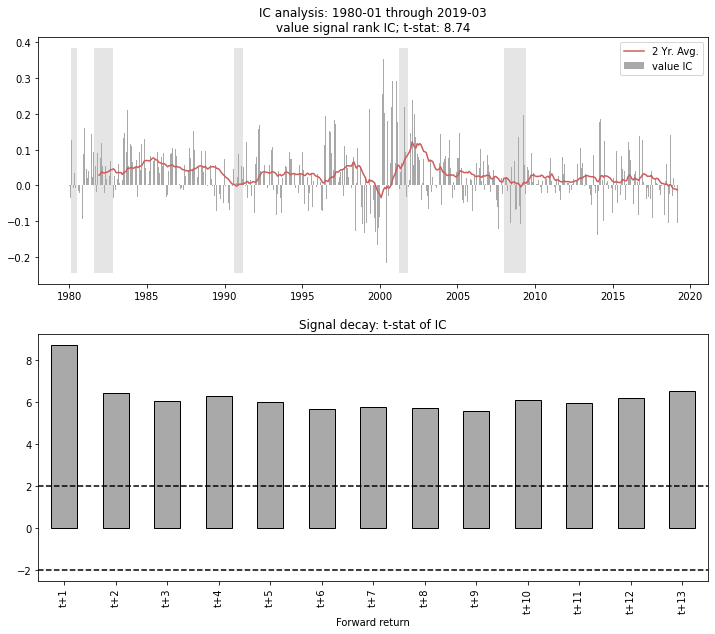

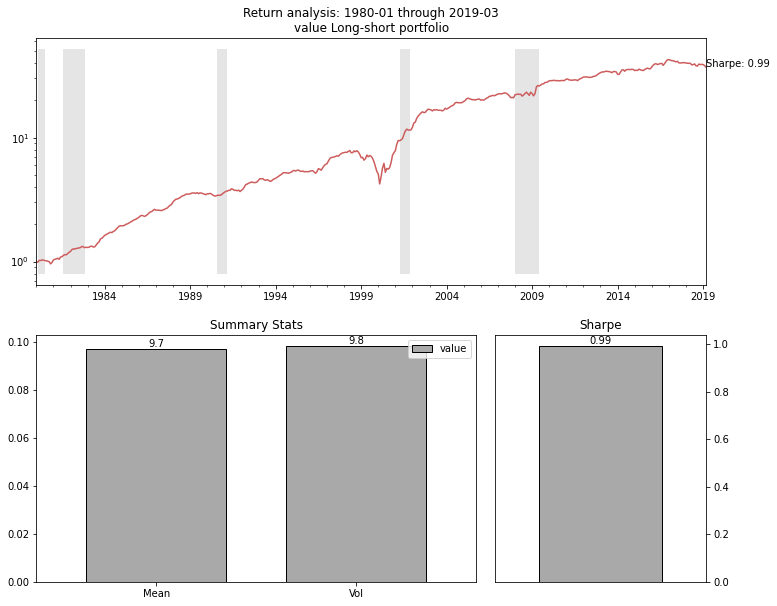

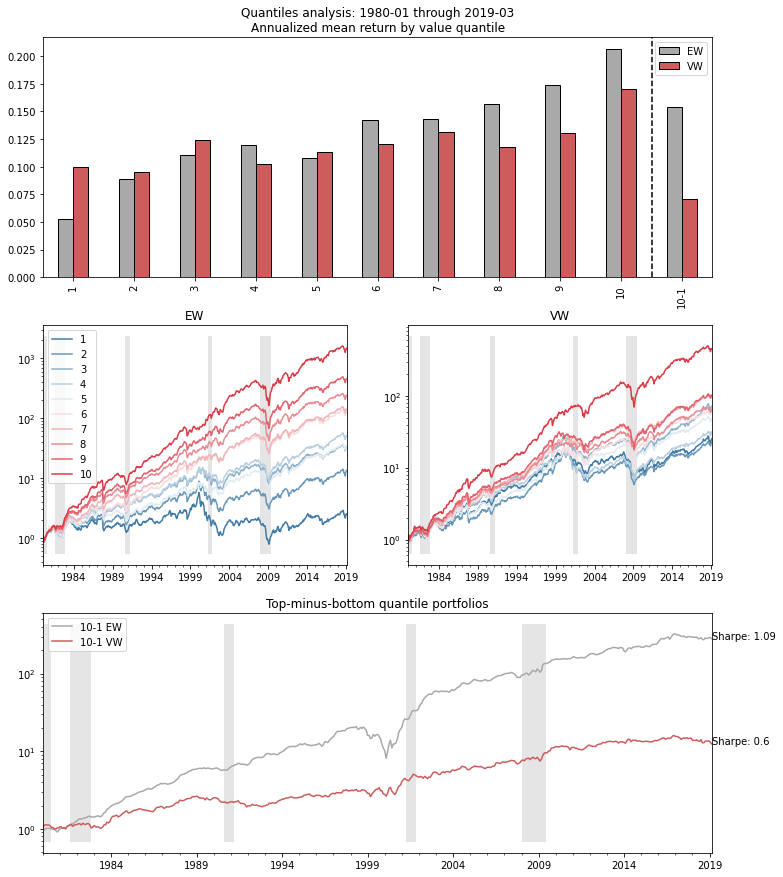

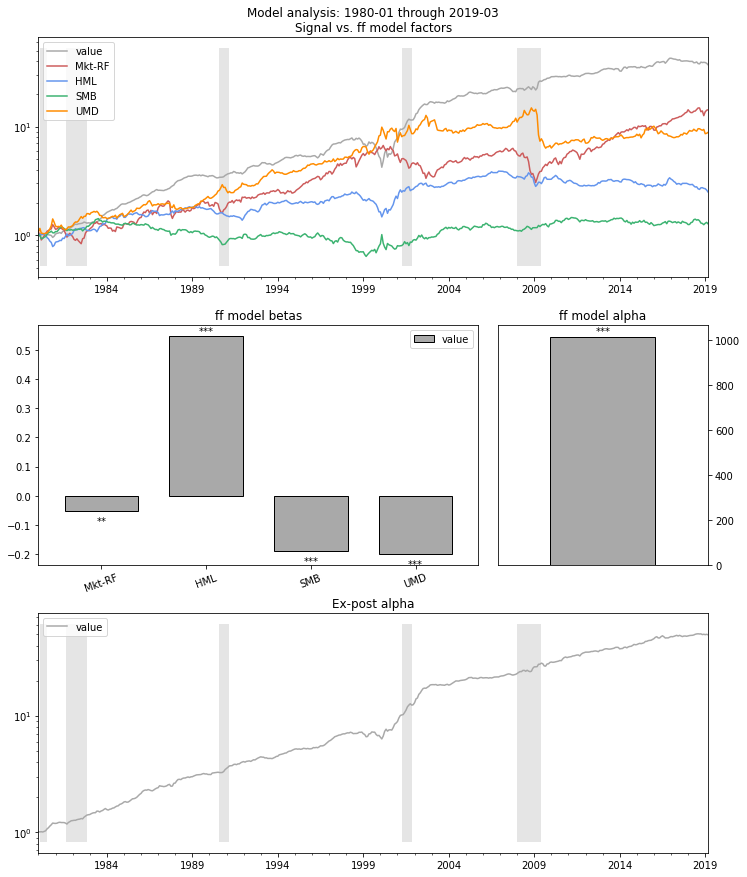

In [23]:
bt.backtest_signals(signals='value',
                    start_date=None,
                    end_date=None,
                    ic_analysis=True,
                    return_analysis=True,
                    quantile_analysis=True,
                    model_analysis=True,
                    average_signal_analysis=False,
                    interaction_analysis=False,
                    time_series_analysis=False,
                    trading_cost_analysis=False,
                    quantiles=10,
                    signal_to_interact=None,
                    model_name='ff')


Same analysis for more recent time period.

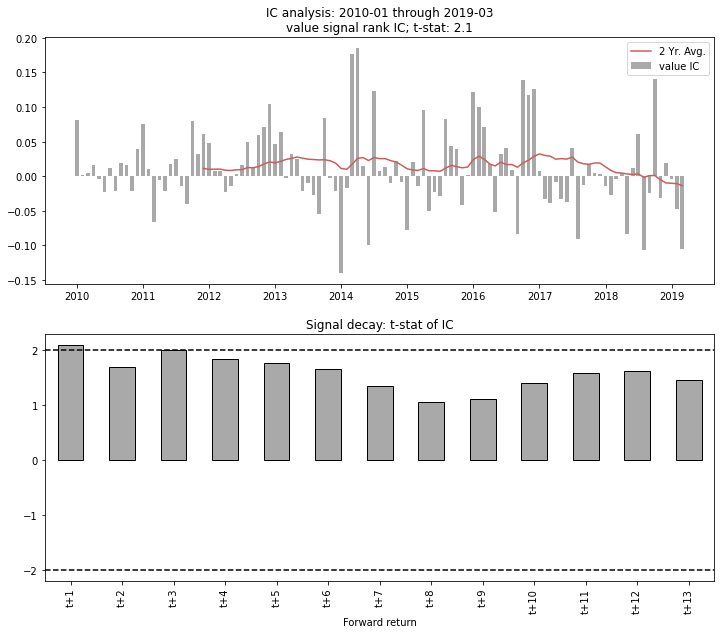

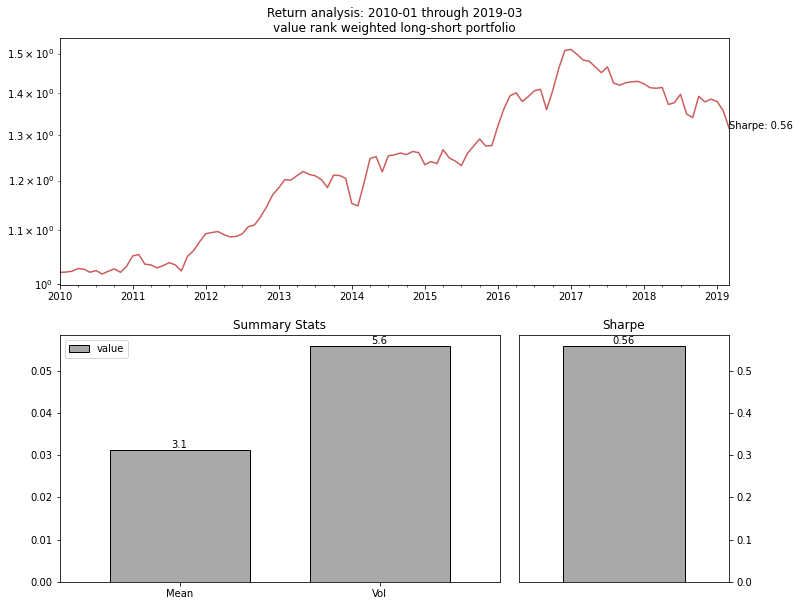

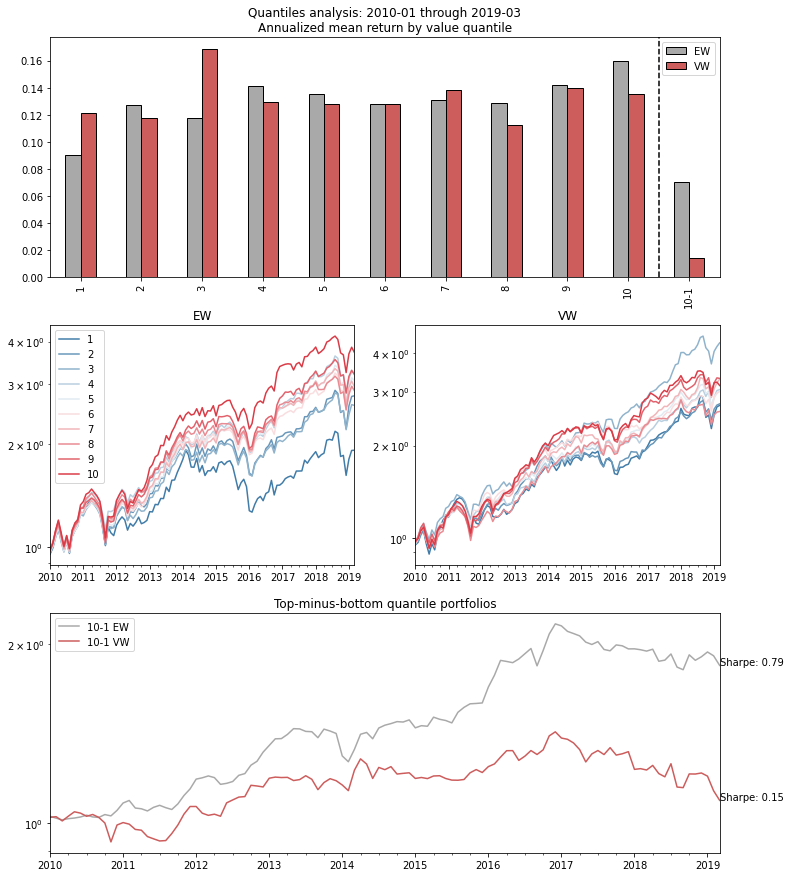

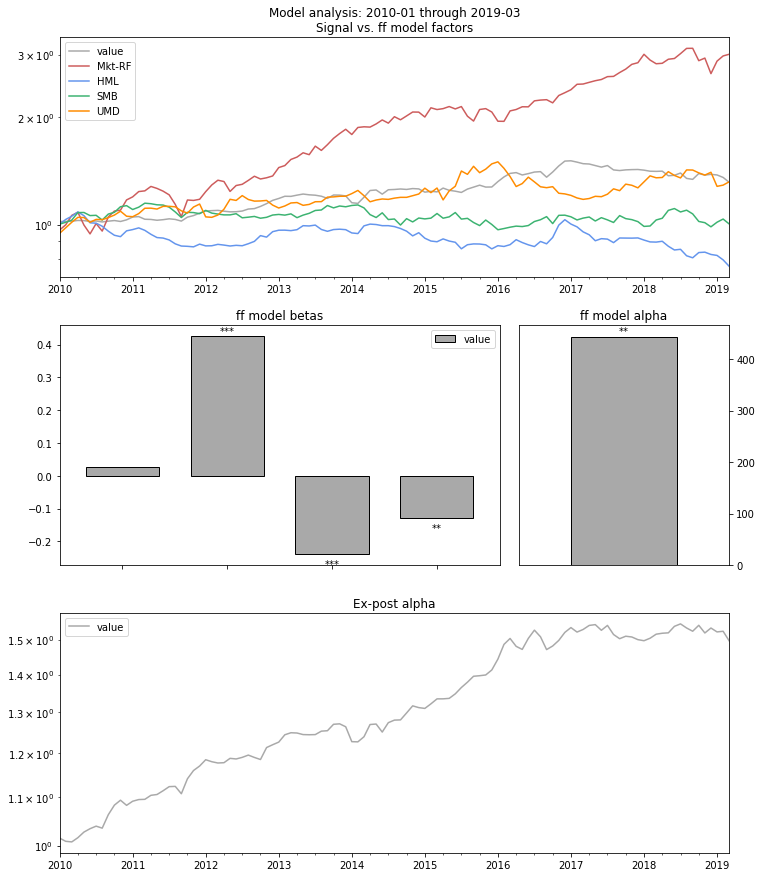

In [2]:
bt.backtest_signals(signals='value',
                   start_date='2010-01-01',
                   ic_analysis=True,
                   return_analysis=True,
                   quantile_analysis=True,
                   model_analysis=True,
                   quantiles=10,
                   model_name='ff')

Backtester can be initialized with a universe and a list of features. The signals below are variations on Novy-Marx earnings fundamental momentum (http://rnm.simon.rochester.edu/research/FMFM.pdf).

In [8]:
bt = Backtester(univ_name='univ_3000',
                feat_list=['sales_momentum', 
                           'eps_momentum', 
                           'prof_momentum',
                           'prof2_momentum', 
                           'cf_momentum', 
                           'cf2_momentum'],
                weights=[1],
                industry_adjust=False,
                ffill=3)

getting feature dataframe from features.pkl
reading universe from universes/univ_3000.pkl
initializing model from feature names
creating signal dataframe


Example comparing a number of signals. Regression analysis can use a previously output model, instead of Fama-French 3 Factor + Momentum. The returns of these signals are explained by the "fmomentum" signal created above.

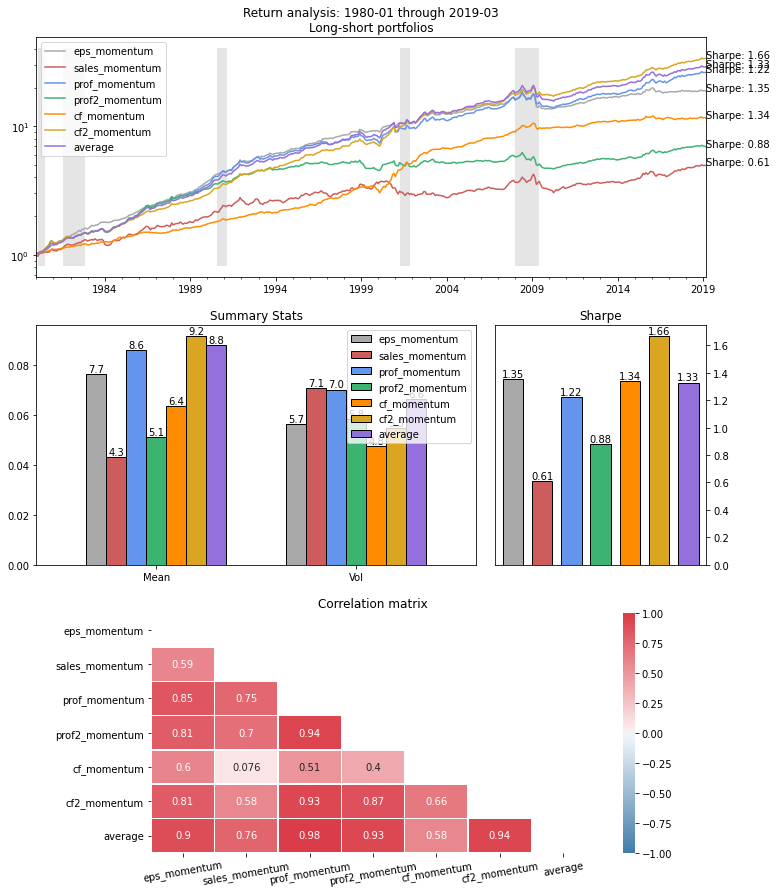

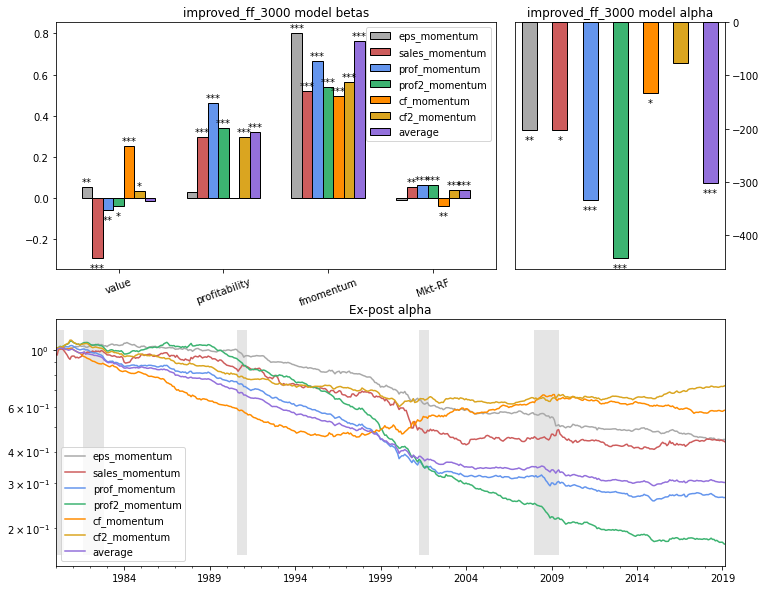

In [4]:
bt.backtest_signals(signals=['eps_momentum',
                            'sales_momentum',
                            'prof_momentum',
                            'prof2_momentum',
                            'cf_momentum',
                            'cf2_momentum'],
                    start_date=None,
                    end_date=None,
                    average_signal_analysis=True,
                    model_name='improved_ff_3000')

Trading cost analysis

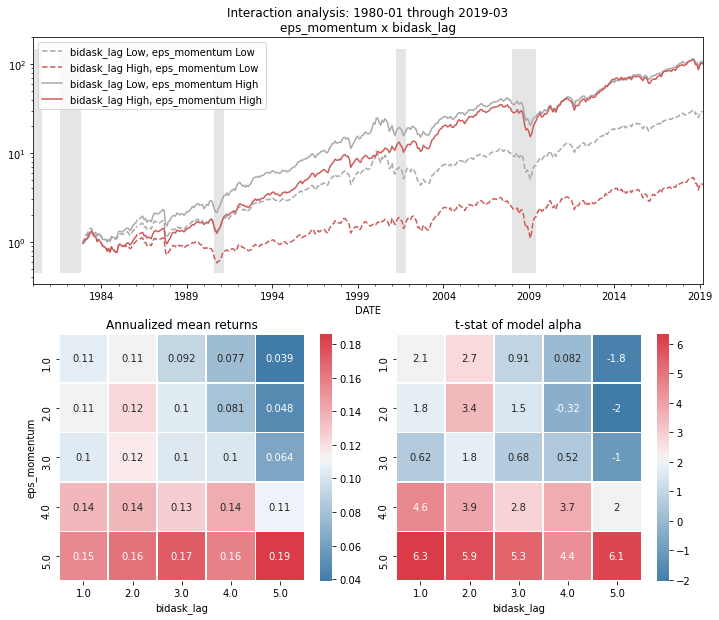

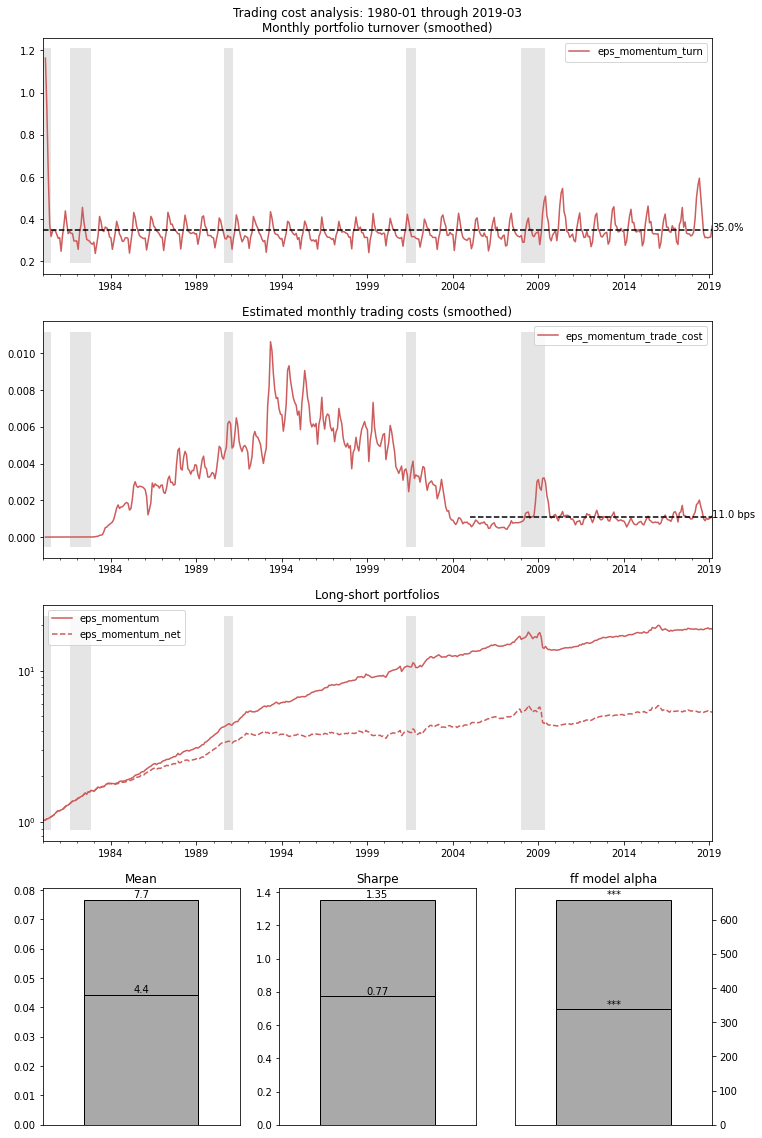

In [13]:
bt.backtest_signals(signals='eps_momentum',
                    interaction_analysis=True,
                    trading_cost_analysis=True,
                    signal_to_interact='bidask_lag',
                    model_name='ff')

Example of incorporating time-series / "macro" factors. Signal below goes long stocks with low short-term residual/idiosyncratic volatility and short stocks with high idiosyncratic volatility (https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/3361/ang_high_idiosyncratic_volatility.pdf).

In [91]:
bt = Backtester(univ_name='univ_3000',
                feat_list=['e_std_22'],
                weights=[-1],
                industry_adjust=True)

getting feature dataframe from features.pkl
reading universe from universes/univ_3000.pkl
initializing model from feature names
creating signal dataframe


Analysis to examine time-series predictability of signal 

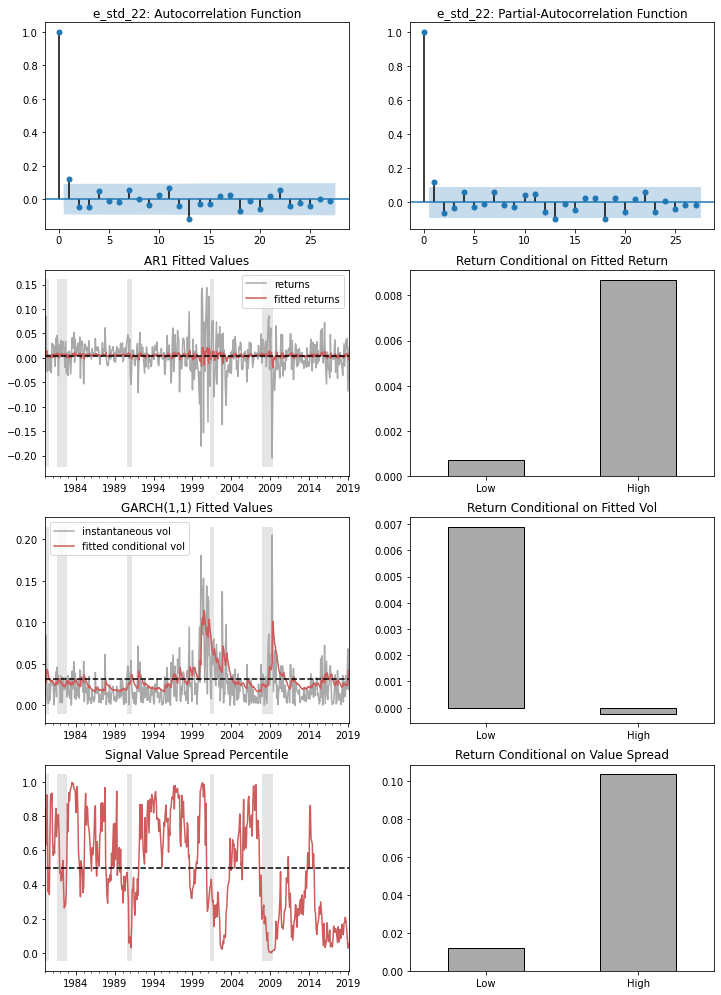

In [92]:
bt.backtest_signals(signals='e_std_22',
                    time_series_analysis=True)

"Macro" factors can be incorporated in model to interact with signals (i.e. signal timing). Simple example below using market volatility as a "macro" factor to avoid the idiosyncratic vol signal during periods of high market vol (when signal is likely to load on market beta, by construction).

In [93]:
macro_model = {
    'macro_factors':[],
    'signal_specs':[]
}
macro_factor1 = {
    'name':'SP500_vol',
    'series':'GarchVol_z',
    'series_type':'macro',
    'kwargs':{'normalizing_func':None,
              'winsorize_cutoff':2,
              'scale':-.5,
              'shift':1
              }
    }
timed_signal1 = {'signal_name':'e_std_22_timed',
                 'base_signal':'e_std_22',
                 'macro_factors':['SP500_vol']}

macro_model['macro_factors'].append(macro_factor1)
macro_model['signal_specs'].append(timed_signal1)
bt.create_macro_factors(macro_model)

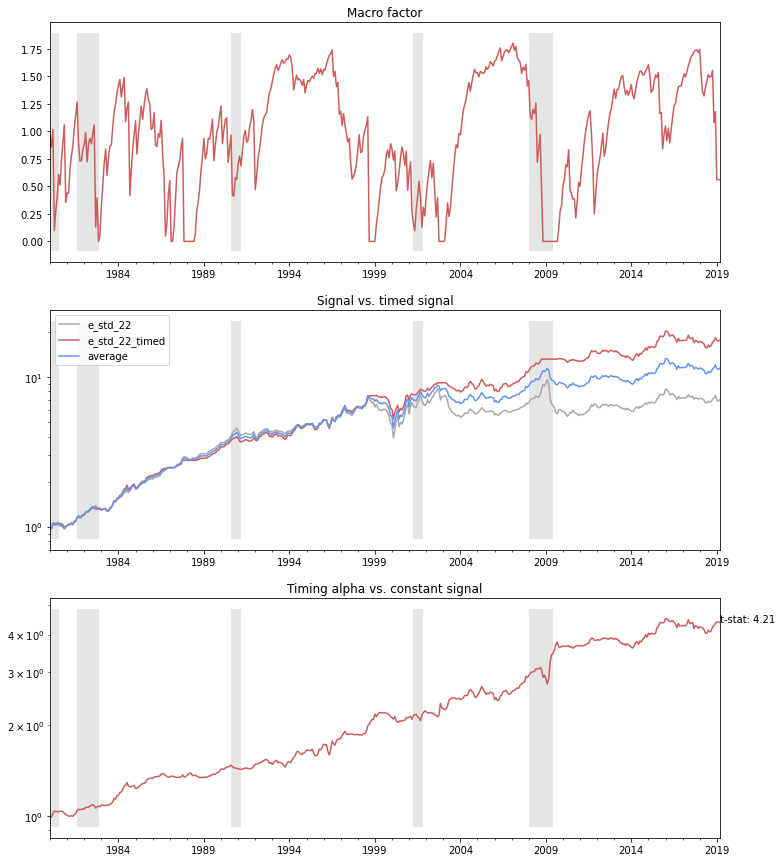

In [94]:
bt.backtest_signals(signals='e_std_22',
                    factor_timing_analysis=True,
                    macro_factors='SP500_vol')

## SecurityRanker functionality

In [2]:
from optimize_portfolios import SecurityRanker

SecurityRanker is initialized with the name of a previously saved model.

In [21]:
sr = SecurityRanker(model_name='improved_ff_3000')

importing model improved_ff_3000


Signals in the model are combined either using constant weights, or applying a rolling optimization. The rolling optimization has a number of different methods/parameters. Each run is saved under a given name.

In [3]:
sr.rank_constant('equal_weight')

In [4]:
sr.rank_rolling(name='riskparity1',
        method='riskparity',
        reestimate_freq=1,
        start_date='1990-01-01',
        cov_model='expw',
        halflife=12)

getting weights for 1990-01
getting weights for 1990-02
getting weights for 1990-03
getting weights for 1990-04
getting weights for 1990-05
getting weights for 1990-06
getting weights for 1990-07
getting weights for 1990-08
getting weights for 1990-09
getting weights for 1990-10
getting weights for 1990-11
getting weights for 1990-12
getting weights for 1991-01
getting weights for 1991-02
getting weights for 1991-03
getting weights for 1991-04
getting weights for 1991-05
getting weights for 1991-06
getting weights for 1991-07
getting weights for 1991-08
getting weights for 1991-09
getting weights for 1991-10
getting weights for 1991-11
getting weights for 1991-12
getting weights for 1992-01
getting weights for 1992-02
getting weights for 1992-03
getting weights for 1992-04
getting weights for 1992-05
getting weights for 1992-06
getting weights for 1992-07
getting weights for 1992-08
getting weights for 1992-09
getting weights for 1992-10
getting weights for 1992-11
getting weights for 

getting weights for 2015-05
getting weights for 2015-06
getting weights for 2015-07
getting weights for 2015-08
getting weights for 2015-09
getting weights for 2015-10
getting weights for 2015-11
getting weights for 2015-12
getting weights for 2016-01
getting weights for 2016-02
getting weights for 2016-03
getting weights for 2016-04
getting weights for 2016-05
getting weights for 2016-06
getting weights for 2016-07
getting weights for 2016-08
getting weights for 2016-09
getting weights for 2016-10
getting weights for 2016-11
getting weights for 2016-12
getting weights for 2017-01
getting weights for 2017-02
getting weights for 2017-03
getting weights for 2017-04
getting weights for 2017-05
getting weights for 2017-06
getting weights for 2017-07
getting weights for 2017-08
getting weights for 2017-09
getting weights for 2017-10
getting weights for 2017-11
getting weights for 2017-12
getting weights for 2018-01
getting weights for 2018-02
getting weights for 2018-03
getting weights for 

Rankings can be saved.

In [24]:
sr.output_rankings('test1')

SecurityRanker can also be initialized from a previously saved ranking

In [3]:
sr = SecurityRanker(model_name='improved_ff_3000',ranking_name='ranking_demo')

importing previously saved ranking ranking_demo on model improved_ff_3000


In [4]:
for name,spec in sr.ranking_specs.items():
    print('===========================')
    print('run name: '+name)
    for key,value in spec.items():
        print('----',key,':',value)

run name: riskparity_expw
---- method : riskparity
---- start_date : 1990-01-01
---- reestimate_freq : 1
---- cov_model : expw
---- halflife : 12
run name: riskparity_garch
---- method : riskparity
---- start_date : 1990-01-01
---- reestimate_freq : 1
---- cov_model : ogarch
run name: markowitz
---- method : markowitz
---- start_date : 1990-01-01
---- reestimate_freq : 1
---- cov_model : ogarch
---- mean_model : ar1
run name: sharpe
---- method : parametricopt
---- start_date : 1990-01-01
---- reestimate_freq : 1
---- loss : return_loss
run name: equal_weight
---- method : const
---- const_weights : [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


Compare a number of rankings.

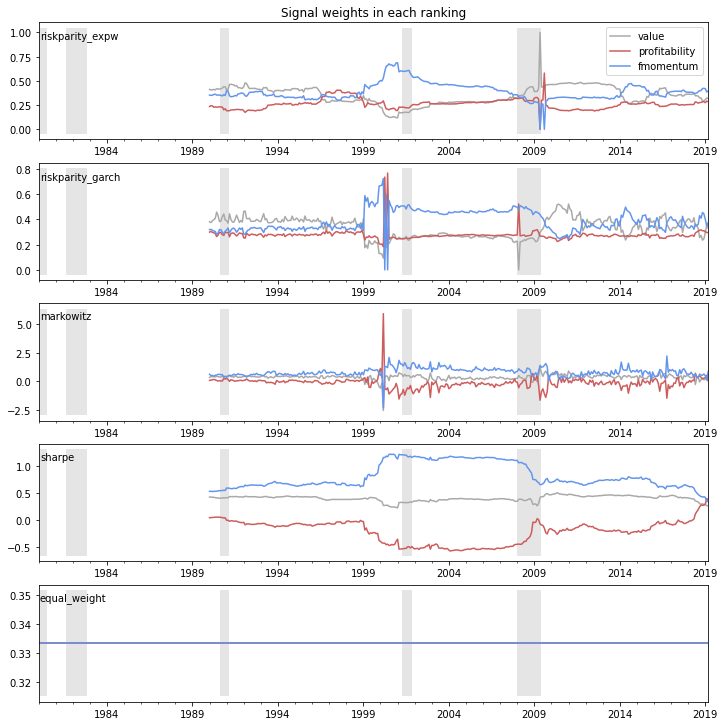

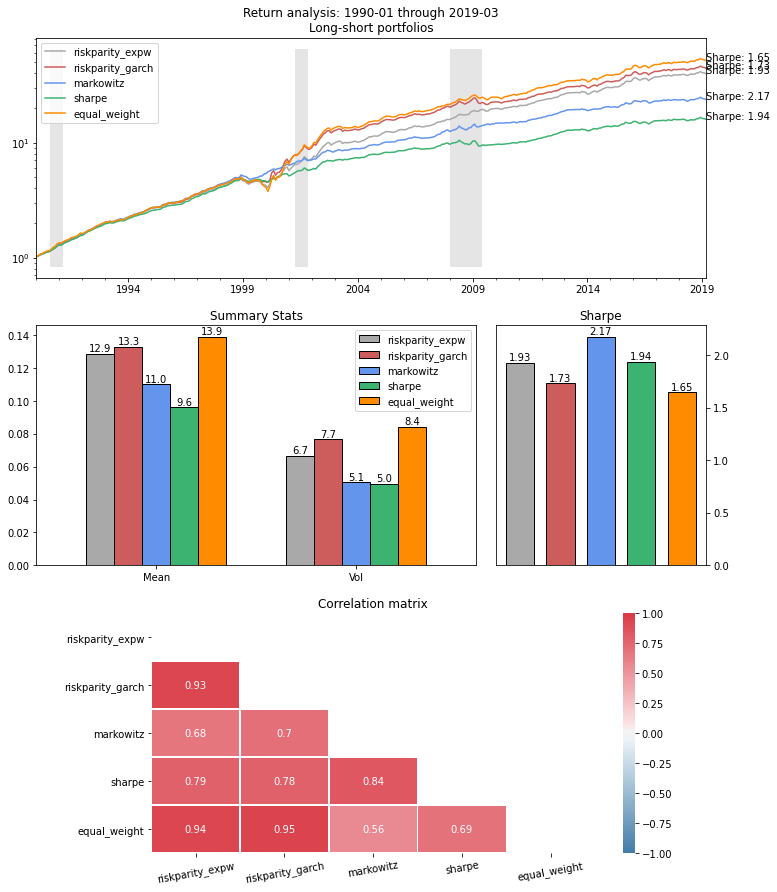

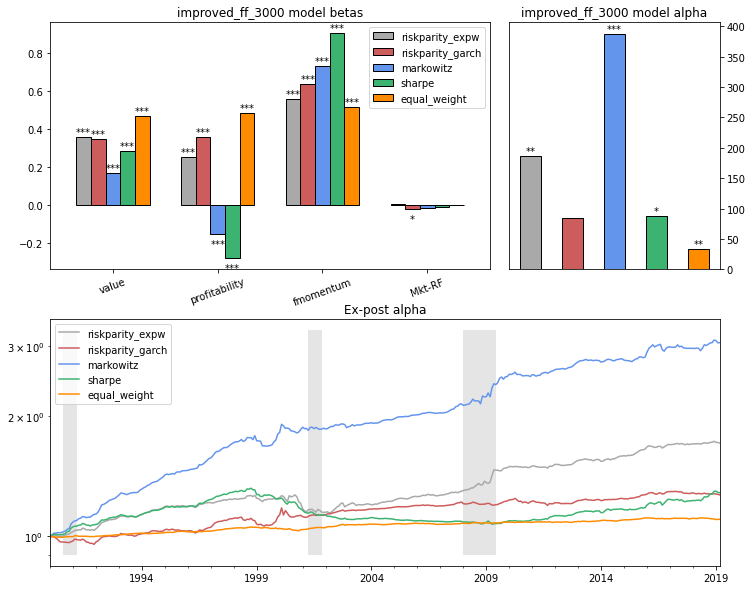

In [5]:
sr.analyze_rankings()

SecurityRanker also can backtest rankings in the same way as the Backtester tool.

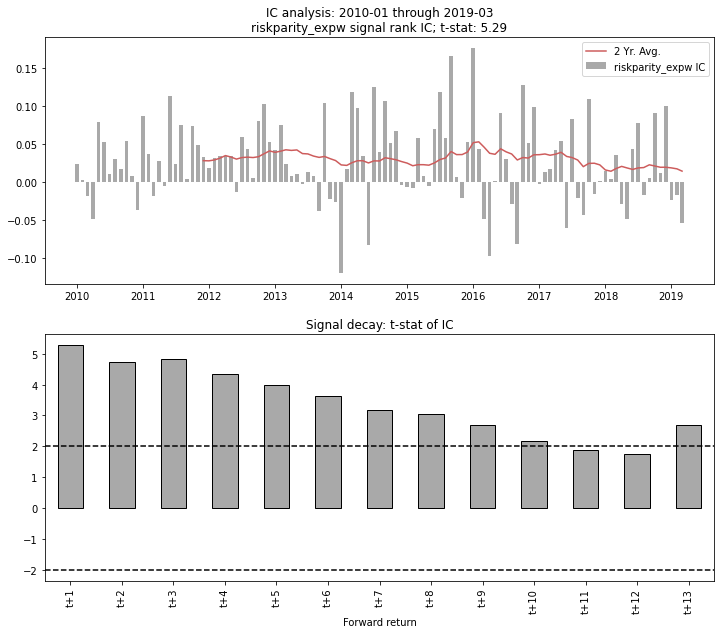

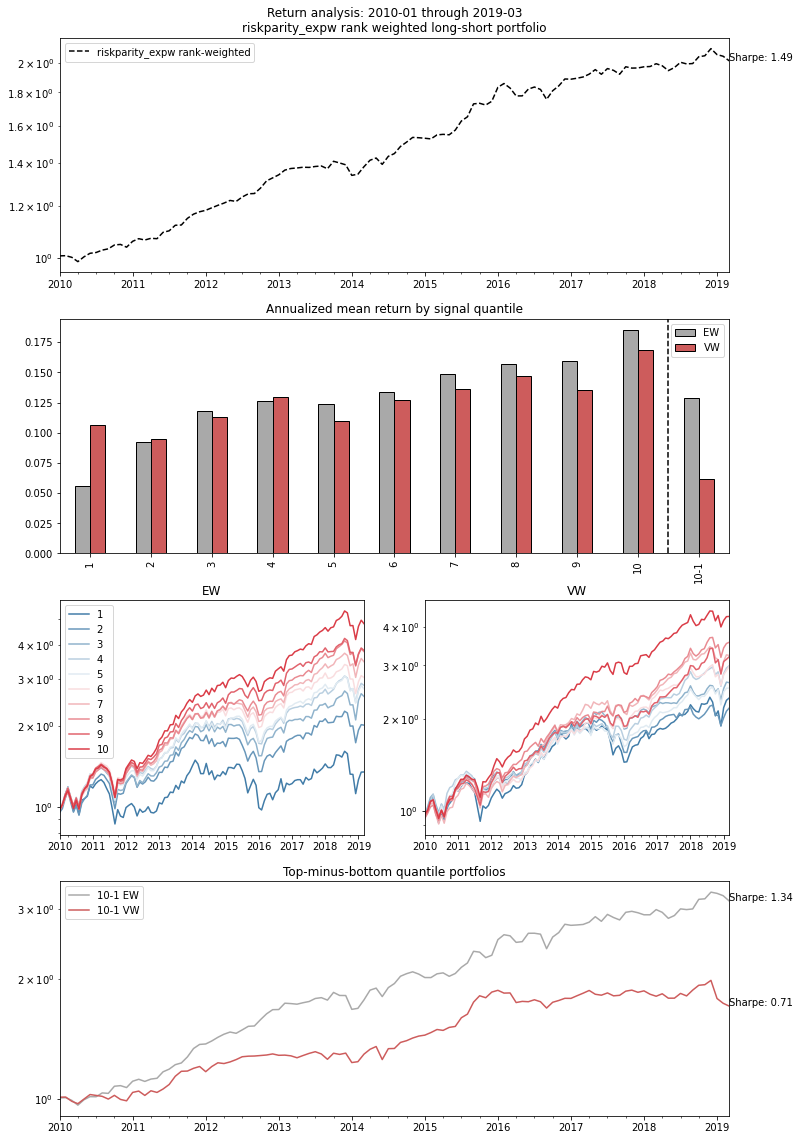

In [6]:
sr.backtest_signal('riskparity_expw',start_date='2010-01-01',ic_analysis=True,return_analysis=True)

## PortfolioConstructor functionality

In [2]:
from optimize_portfolios import PortfolioConstructor

PortfolioConstructor is initialized with a previously output model, a previously output set of rankings, and a ranking (or list of rankings) to use as overall ranking to construct portfolios off of.

In [34]:
pc = PortfolioConstructor(model_name='improved_ff_3000',
                          ranking_name='ranking_demo',
                          rankings_to_use=['markowitz','riskparity_expw']) #will average if multiple given

importing previously saved ranking ranking_demo on model improved_ff_3000


Creates equal-weight portfolios of n_securities in both the long and short leg. Parameters can control how frequently portfolios are rebalanced and how much to penalize portfolio turnover.

In [4]:
pc.construct_portfolio(name='portfolio1',
                       n_securities=100, #number of securities to target in long & short legs
                       turn_penalty=0, #parameter to control portfolio turnover
                       rebalance_freq=1)

getting portfolio weights for 1990-01
getting portfolio weights for 1990-02
getting portfolio weights for 1990-03
getting portfolio weights for 1990-04
getting portfolio weights for 1990-05
getting portfolio weights for 1990-06
getting portfolio weights for 1990-07
getting portfolio weights for 1990-08
getting portfolio weights for 1990-09
getting portfolio weights for 1990-10
getting portfolio weights for 1990-11
getting portfolio weights for 1990-12
getting portfolio weights for 1991-01
getting portfolio weights for 1991-02
getting portfolio weights for 1991-03
getting portfolio weights for 1991-04
getting portfolio weights for 1991-05
getting portfolio weights for 1991-06
getting portfolio weights for 1991-07
getting portfolio weights for 1991-08
getting portfolio weights for 1991-09
getting portfolio weights for 1991-10
getting portfolio weights for 1991-11
getting portfolio weights for 1991-12
getting portfolio weights for 1992-01
getting portfolio weights for 1992-02
getting port

getting portfolio weights for 2008-01
getting portfolio weights for 2008-02
getting portfolio weights for 2008-03
getting portfolio weights for 2008-04
getting portfolio weights for 2008-05
getting portfolio weights for 2008-06
getting portfolio weights for 2008-07
getting portfolio weights for 2008-08
getting portfolio weights for 2008-09
getting portfolio weights for 2008-10
getting portfolio weights for 2008-11
getting portfolio weights for 2008-12
getting portfolio weights for 2009-01
getting portfolio weights for 2009-02
getting portfolio weights for 2009-03
getting portfolio weights for 2009-04
getting portfolio weights for 2009-05
getting portfolio weights for 2009-06
getting portfolio weights for 2009-07
getting portfolio weights for 2009-08
getting portfolio weights for 2009-09
getting portfolio weights for 2009-10
getting portfolio weights for 2009-11
getting portfolio weights for 2009-12
getting portfolio weights for 2010-01
getting portfolio weights for 2010-02
getting port

Portfolio optimization runs can be saved, and PortfolioConstructor can be initialized from previously saved optimization runs.

In [7]:
pc.output_portfolios('test1')

In [4]:
pc = PortfolioConstructor(model_name='improved_ff_3000',
                          ranking_name='ranking_demo',
                          portfolio_name='portfolio_demo')

importing from saved portfolio portfolio_demo


In [5]:
for name,spec in pc.portfolio_specs.items():
    print('===========================')
    print('run name: '+name)
    for key,value in spec.items():
        print('----',key,':',value)

run name: portfolio_200_0
---- rankings_used : ['markowitz', 'riskparity_expw']
---- start_date : 1990-01-01
---- n_securities : 200
---- turn_penalty : 0
---- rebalance_freq : 1
run name: portfolio_200_1
---- rankings_used : ['markowitz', 'riskparity_expw']
---- start_date : 1990-01-01
---- n_securities : 200
---- turn_penalty : 0.05
---- rebalance_freq : 1
run name: portfolio_200_2
---- rankings_used : ['markowitz', 'riskparity_expw']
---- start_date : 1990-01-01
---- n_securities : 200
---- turn_penalty : 0.1
---- rebalance_freq : 1


Can visualize how portfolio construction rules select securities. With no penalty on turnover, the top and bottom n_securities are selected from the "overall_ranking".

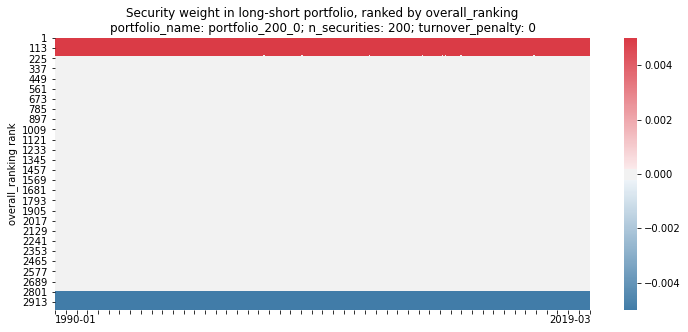

In [6]:
pc.plot_security_selection('portfolio_200_0')

Penalizing turnover results in being forced to hold securities as they fall in "overall_ranking".

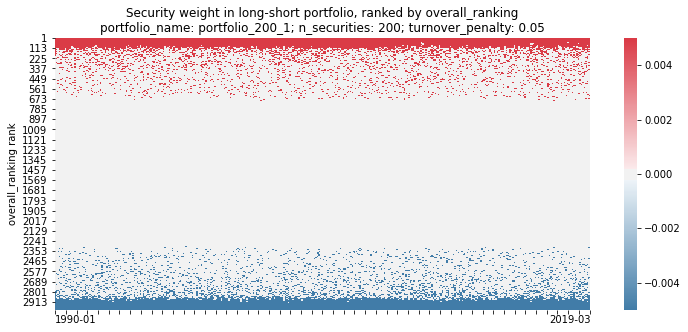

In [7]:
pc.plot_security_selection('portfolio_200_1')

Can also visualize against other rankings, for example we can see the effects of the "fmomentum" signal having a larger weight in the "overall_ranking", compared to "profitability".

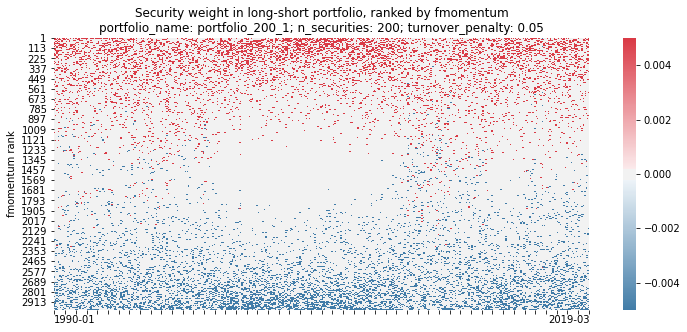

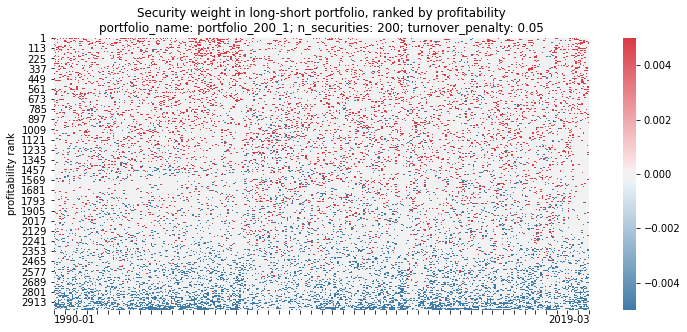

In [17]:
pc.plot_security_selection('portfolio_200_1',ranking_name='fmomentum')
pc.plot_security_selection('portfolio_200_1',ranking_name='profitability')

Compare results of different portfolio construction rules; i.e. different levels of turnover. Below, pre-trading cost performance declines as turnover is penalized more heavily; however, some turnover penalty improves estimated post-cost performance.

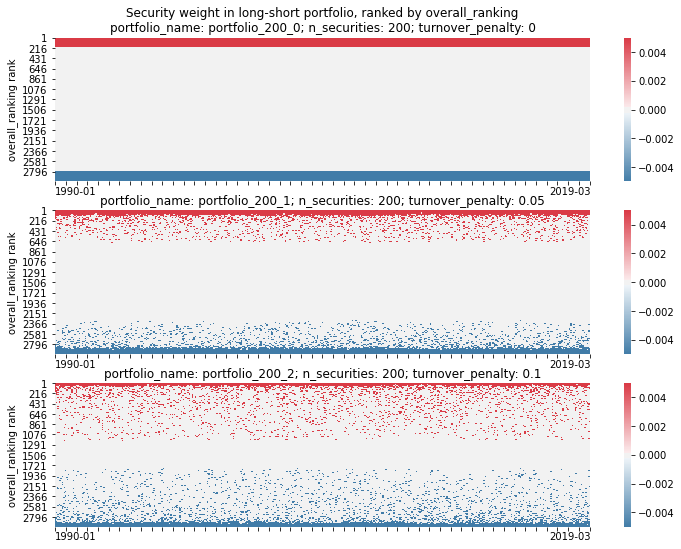

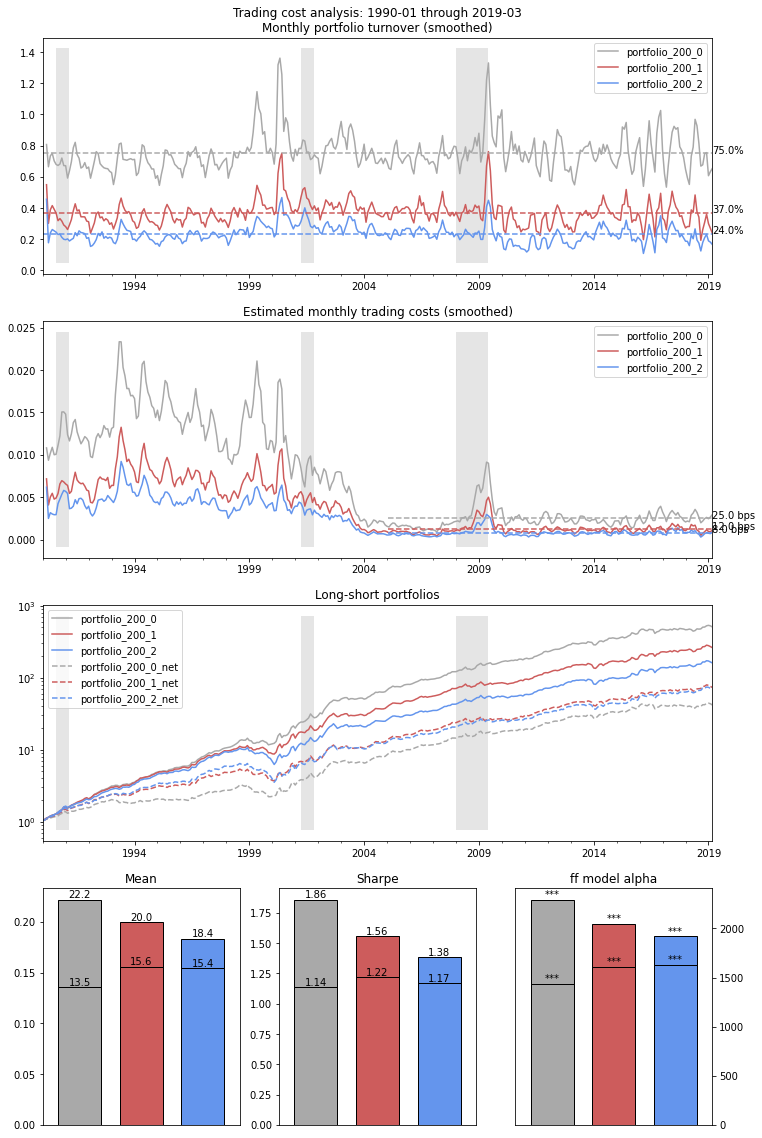

In [23]:
pc.analyze_portfolios()